In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
zoe = pd.read_excel('../data/latest_Zoe central.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '../data/latest_Zoe central.xlsx'

In [3]:
full_data = pd.read_csv('../data/area_extracted_feats.csv')

timesteps = pd.read_csv('../data/grade_timesteps.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/area_extracted_feats.csv'

In [450]:
basic_time_cols = ['tPNf', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 'tM']

In [481]:
zoe['id'] = zoe['Slide ID'] + "_" + zoe['Well'].astype(str)

In [525]:
sample_ids = [
    "D2017.09.15_S1620_I149_8", "D2016.10.08_S1407_I149_5",
    "D2019.01.25_S01939_I0149_D_1", "D2016.02.06_S1218_I149_1",
    "D2019.04.12_S01977_I0149_D_6", "D2016.02.06_S1219_I149_8",
    "D2017.11.13_S01657_I0149_D_3", "D2019.02.18_S01955_I0149_D_3",
    "D2017.04.06_S1537_I149_1", "D2018.01.15_S01698_I0149_D_11",
    "D2019.02.04_S01942_I0149_D_6", "D2016.11.11_S1427_I149_3",
    "D2016.12.16_S1455_I149_1", "D2018.02.28_S01729_I0149_D_2",
    "D2018.03.20_S01749_I0149_D_5", "D2018.01.08_S01691_I0149_D_4",
    "D2017.06.22_S1582_I149_1", "D2018.01.13_S01696_I0149_D_6",
    "D2018.01.21_S01702_I0149_D_4", "D2018.03.21_S01751_I0149_D_9",
    "D2018.10.09_S01879_I0149_D_3", "D2017.11.11_S01654_I0149_D_12",
    "D2017.03.11_S1518_I149_12", "D2018.01.15_S01698_I0149_D_11",
    "D2016.12.08_S1449_I149_9", "D2019.02.18_S01953_I0149_D_12",
    "D2017.01.21_S1477_I149_6", "D2017.11.20_S01664_I0149_D_9",
    "D2017.01.07_S1460_I149_7", "D2018.04.07_S01763_I0149_D_10"
]

In [526]:
good_grade_ids = zoe.loc[zoe['Morphological Grade - Value'].isin(
    [1, 2])]['id'].unique()

In [527]:
sample_embryos = full_data.loc[full_data['id'].isin(good_grade_ids)][[
    'id'
]].drop_duplicates(subset=['id']).sample(n=1)
sample_data = pd.merge(full_data, sample_embryos, on='id', how='right')
sample_t = timesteps.loc[timesteps['id'] ==
                         sample_data['id'].iloc[0]]['dt'].values * 24

sample_metadata = zoe.loc[zoe['id'] ==
                          sample_data['id'].iloc[0]][basic_time_cols]

In [528]:
start_idx = sample_metadata[basic_time_cols[1]].values[0] > sample_t

indices = np.nonzero(start_idx)

# The first and last indices will be the first and last True values
first = indices[0][0]
t2_idx = indices[0][-1] - 10

end_idx = sample_metadata[basic_time_cols[7]].values[0] < sample_t

indices = np.nonzero(end_idx)

# The first and last indices will be the first and last True values
t8_idx = indices[0][0]
# t8_idx = indices[0][-1] + 10


In [529]:
sample_metadata

,tPNf,t2,t3,t4,t5,t6,t7,t8,tM
19053,22.738058,25.327211,37.080489,37.080489,49.345161,49.345161,50.873441,53.400864,79.164662


In [530]:
sample_data['id']

0      D2017.11.29_S01671_I0149_D_1
1      D2017.11.29_S01671_I0149_D_1
2      D2017.11.29_S01671_I0149_D_1
3      D2017.11.29_S01671_I0149_D_1
4      D2017.11.29_S01671_I0149_D_1
                   ...             
450    D2017.11.29_S01671_I0149_D_1
451    D2017.11.29_S01671_I0149_D_1
452    D2017.11.29_S01671_I0149_D_1
453    D2017.11.29_S01671_I0149_D_1
454    D2017.11.29_S01671_I0149_D_1
Name: id, Length: 455, dtype: object

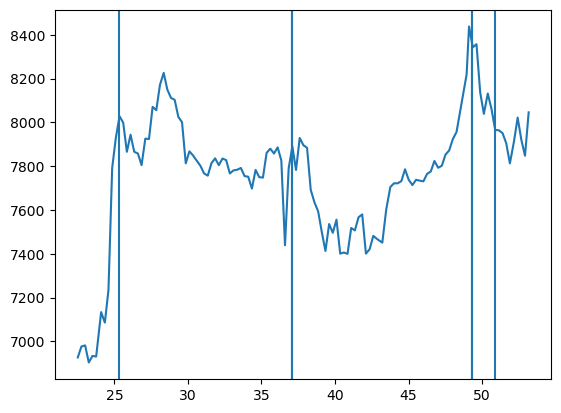

In [531]:
plt.plot(sample_t[t2_idx:t8_idx], sample_data['area'].values[t2_idx:t8_idx])

for t_ in basic_time_cols[1:7]:

    plt.axvline(x=sample_metadata[t_].values[0])

/var/folders/gb/2dm73f1s22n8755ydqgrblxw0000gn/T/ipykernel_4023/2573344235.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  full_data.loc[full_data['id'].isin(sample_ids)].groupby('id').apply(


id
D2016.02.06_S1218_I149_1          [Line2D(_child0)]
D2016.02.06_S1219_I149_8          [Line2D(_child1)]
D2016.10.08_S1407_I149_5          [Line2D(_child2)]
D2016.11.11_S1427_I149_3          [Line2D(_child3)]
D2016.12.08_S1449_I149_9          [Line2D(_child4)]
D2016.12.16_S1455_I149_1          [Line2D(_child5)]
D2017.03.11_S1518_I149_12         [Line2D(_child6)]
D2017.04.06_S1537_I149_1          [Line2D(_child7)]
D2017.06.22_S1582_I149_1          [Line2D(_child8)]
D2017.09.15_S1620_I149_8          [Line2D(_child9)]
D2017.11.11_S01654_I0149_D_12    [Line2D(_child10)]
D2017.11.13_S01657_I0149_D_3     [Line2D(_child11)]
D2018.01.08_S01691_I0149_D_4     [Line2D(_child12)]
D2018.01.13_S01696_I0149_D_6     [Line2D(_child13)]
D2018.01.15_S01698_I0149_D_11    [Line2D(_child14)]
D2018.01.21_S01702_I0149_D_4     [Line2D(_child15)]
D2018.02.28_S01729_I0149_D_2     [Line2D(_child16)]
D2018.03.20_S01749_I0149_D_5     [Line2D(_child17)]
D2018.03.21_S01751_I0149_D_9     [Line2D(_child18)]
D2018.10.

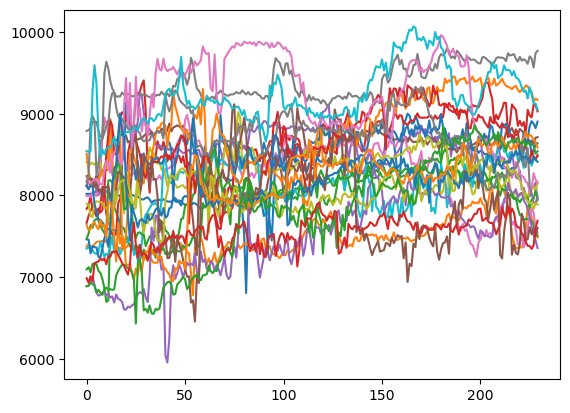

In [463]:
full_data.loc[full_data['id'].isin(sample_ids)].groupby('id').apply(
    lambda x: plt.plot(x.area.values[80:310]))